In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy

In [26]:
df = pd.read_csv('bike-data.csv')

In [27]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
df = df.drop(df.columns[[0]], axis=1) 

In [29]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [30]:
df = df.rename(columns={"yr": "year", "mnth": "month", "hr": "hour", "hum": "humidity", "atemp": "feels_like", "cnt": "total_rentals", "casual": "nonregistered_rental", "registered": "registered_rentals", "weathersit": "weather_code" })

In [31]:
df.describe()

,season,year,month,hour,holiday,weekday,workingday,weather_code,temp,feels_like,humidity,windspeed,nonregistered_rental,registered_rentals,total_rentals
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [32]:
df.head()

,dteday,season,year,month,hour,holiday,weekday,workingday,weather_code,temp,feels_like,humidity,windspeed,nonregistered_rental,registered_rentals,total_rentals
0,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1/1/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1/1/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


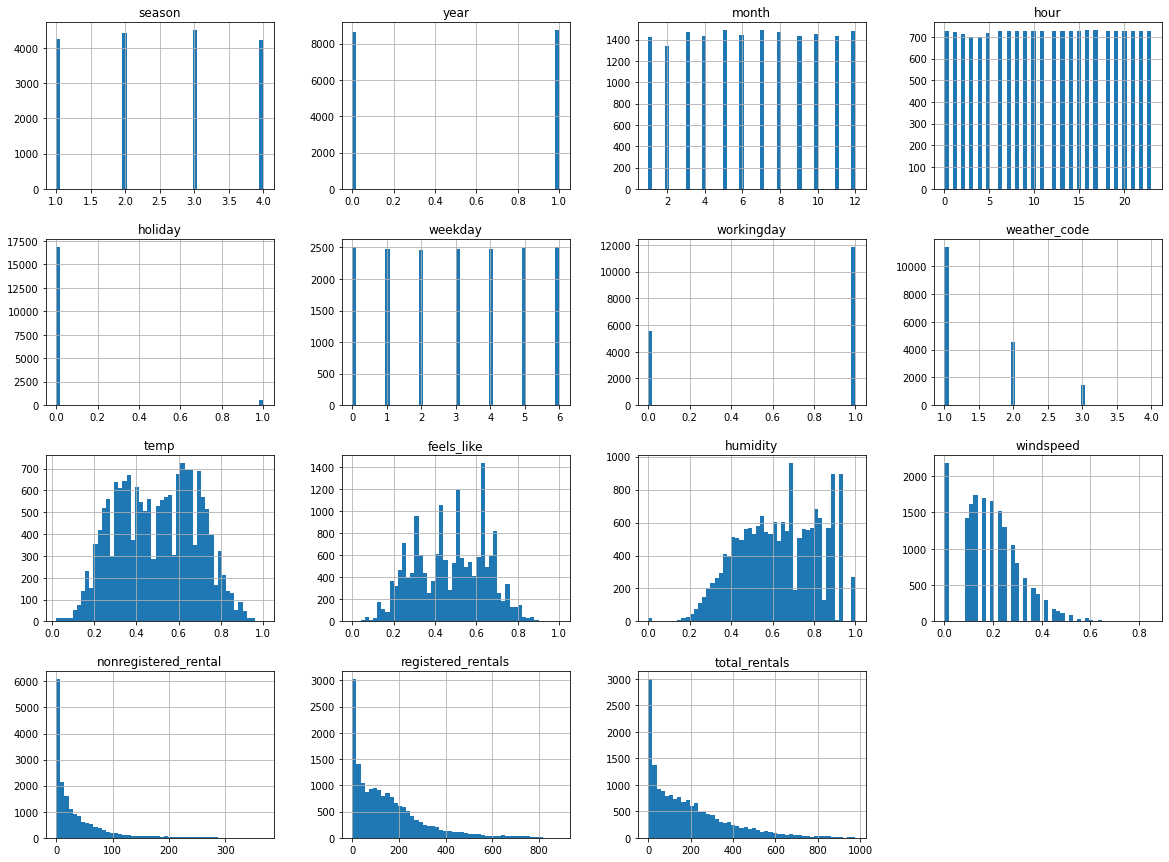

In [33]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
corr_matrix = df.corr()

In [36]:
corr_matrix["total_rentals"].sort_values(ascending=False)

total_rentals           1.000000
registered_rentals      0.972151
nonregistered_rental    0.694564
temp                    0.404772
feels_like              0.400929
hour                    0.394071
year                    0.250495
season                  0.178056
month                   0.120638
windspeed               0.093234
workingday              0.030284
weekday                 0.026900
holiday                -0.030927
weather_code           -0.142426
humidity               -0.322911
Name: total_rentals, dtype: float64

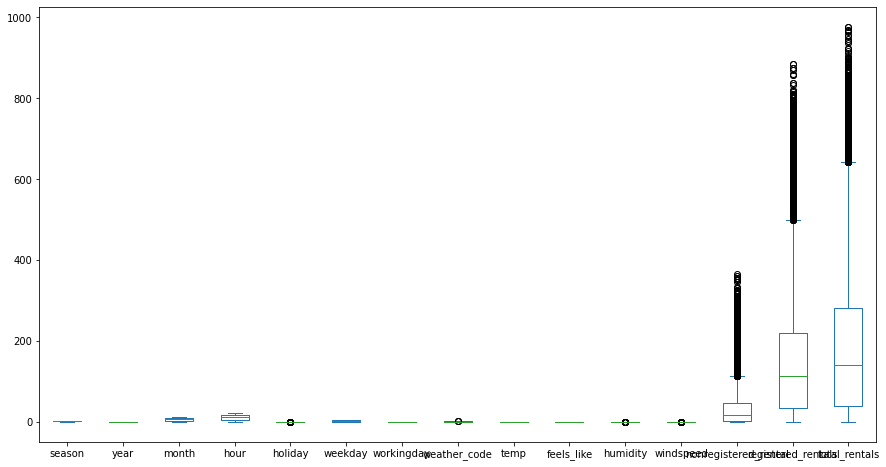

In [39]:
df.plot(kind='box', figsize=(15, 8))
plt.show()